In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("student_performance_2.csv")

In [3]:
df.shape

(7000, 8)

In [4]:
df.isnull()

,Student ID,Gender,Age,School,Math Score,Reading Score,Writing Score,Class Performance
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
6995,False,False,False,False,False,False,False,False
6996,False,False,False,False,False,False,False,False
6997,False,False,False,False,False,False,False,False
6998,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()

Student ID             0
Gender                 0
Age                    0
School                 0
Math Score           358
Reading Score        345
Writing Score        337
Class Performance      0
dtype: int64

In [6]:
df.info

<bound method DataFrame.info of       Student ID  Gender  Age School  Math Score  Reading Score  \
0              1    Male   18      C        99.0           94.0   
1              2    Male   17      D        78.0           61.0   
2              3  Female   21      B        67.0           95.0   
3              4  Female   20      E        67.0           67.0   
4              5  Female   20      B        66.0           81.0   
...          ...     ...  ...    ...         ...            ...   
6995        6996  Female   17      C        69.0           72.0   
6996        6997  Female   21      E        70.0           79.0   
6997        6998    Male   21      C        80.0           79.0   
6998        6999    Male   20      A        74.0           80.0   
6999        7000    Male   18      D        60.0          100.0   

      Writing Score Class Performance  
0              98.0                 C  
1              98.0                 B  
2              78.0                 A  
3  

In [7]:
df.describe()

,Student ID,Age,Math Score,Reading Score,Writing Score
count,7000.000000,7000.000000,6642.000000,6655.000000,6663.000000
mean,3500.500000,19.006286,80.463264,80.598648,80.293862
std,2020.870275,1.411874,13.153499,12.973563,12.746946
min,1.000000,17.000000,60.000000,60.000000,60.000000
25%,1750.750000,18.000000,70.000000,70.000000,70.000000
50%,3500.500000,19.000000,80.000000,80.000000,80.000000
75%,5250.250000,20.000000,91.000000,91.000000,90.000000
max,7000.000000,21.000000,150.000000,150.000000,149.000000


In [8]:
df['Math Score'] = df['Math Score'].fillna(df['Math Score'].mean())

In [9]:
df.isnull().sum()

Student ID             0
Gender                 0
Age                    0
School                 0
Math Score             0
Reading Score        345
Writing Score        337
Class Performance      0
dtype: int64

In [10]:
df['Math Score']=df['Math Score'].fillna(df['Math Score'].median())

In [11]:
df.isnull().sum()

Student ID             0
Gender                 0
Age                    0
School                 0
Math Score             0
Reading Score        345
Writing Score        337
Class Performance      0
dtype: int64

In [12]:
df.dtypes

Student ID             int64
Gender                object
Age                    int64
School                object
Math Score           float64
Reading Score        float64
Writing Score        float64
Class Performance     object
dtype: object

In [13]:
df['Age']=df['Age'].astype('float')

In [14]:
df.dtypes

Student ID             int64
Gender                object
Age                  float64
School                object
Math Score           float64
Reading Score        float64
Writing Score        float64
Class Performance     object
dtype: object

In [15]:
from numpy.random import seed, randn
from numpy import mean, std

# Setting seed for reproducibility
seed(1)

# Generating random data with mean 50 and standard deviation 5
data = 5 * randn(10000) + 50

# Calculating mean and standard deviation
mean_value = mean(data)
std_deviation = std(data)
print('Mean: %.3f, Standard Deviation: %.3f' % (mean_value, std_deviation))

# Detecting outliers using z-score method
lower_bound = mean_value - 3 * std_deviation
upper_bound = mean_value + 3 * std_deviation

# Finding outliers
outliers = [x for x in data if x < lower_bound or x > upper_bound]
print("Outliers:", outliers)


Mean: 50.049, Standard Deviation: 4.994
Outliers: [65.15428556186015, 69.79301352018982, 66.60539378085183, 34.73117809786848, 34.23321274904475, 34.91984007395351, 67.1633171589778, 34.679293219474495, 68.70124451852294, 65.67523670043954, 66.19171598376188, 33.73482882511691, 65.66014864070253, 65.06377284118616, 34.0469182658796, 33.6969245211173, 67.02151137874486, 65.59239795391275, 66.49270261640393, 65.74492012609815, 33.525707966507426, 34.72183379792847, 70.1342452227369, 33.90433947188079, 65.55945915508362, 68.06638503541573, 66.99057828251213, 67.80436660352774, 31.717799503726024]


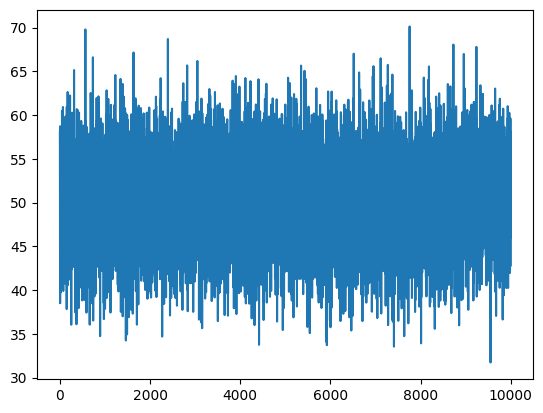

In [17]:
import matplotlib.pyplot as plt
plt.plot(data)

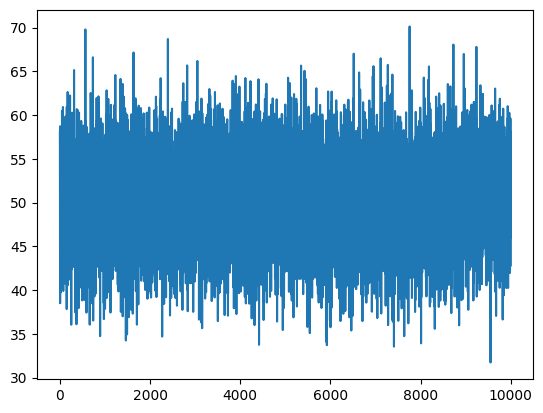

In [19]:
outliers_removed = [x for x in data if x >=lower_bound or x <=upper_bound]
plt.plot(outliers_removed)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
mms = MinMaxScaler()

In [22]:
df[['Math Score','Reading Score','Writing Score']]=mms.fit_transform(df[['Math Score','Reading Score','Writing Score']])

In [23]:
df.head()

,Student ID,Gender,Age,School,Math Score,Reading Score,Writing Score,Class Performance
0,1,Male,18.0,C,0.433333,0.377778,0.426966,C
1,2,Male,17.0,D,0.200000,0.011111,0.426966,B
2,3,Female,21.0,B,0.077778,0.388889,0.202247,A
3,4,Female,20.0,E,0.077778,0.077778,0.292135,C
4,5,Female,20.0,B,0.066667,0.233333,0.157303,B
